In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, GRU
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score

## Load Dataset

In [90]:
data = pd.read_csv('GlaucomaM.csv')

In [91]:
data.head()

,ag,at,as,an,ai,eag,eat,eas,ean,eai,...,tmt,tms,tmn,tmi,mr,rnf,mdic,emd,mv,Class
0,2.220,0.354,0.580,0.686,0.601,1.267,0.336,0.346,0.255,0.331,...,-0.018,-0.230,-0.510,-0.158,0.841,0.410,0.137,0.239,0.035,normal
1,2.681,0.475,0.672,0.868,0.667,2.053,0.440,0.520,0.639,0.454,...,-0.014,-0.165,-0.317,-0.192,0.924,0.256,0.252,0.329,0.022,normal
2,1.979,0.343,0.508,0.624,0.504,1.200,0.299,0.396,0.259,0.246,...,-0.097,-0.235,-0.337,-0.020,0.795,0.378,0.152,0.250,0.029,normal
3,1.747,0.269,0.476,0.525,0.476,0.612,0.147,0.017,0.044,0.405,...,-0.035,-0.449,-0.217,-0.091,0.746,0.200,0.027,0.078,0.023,normal
4,2.990,0.599,0.686,1.039,0.667,2.513,0.543,0.607,0.871,0.492,...,-0.105,0.084,-0.012,-0.054,0.977,0.193,0.297,0.354,0.034,normal


In [152]:
print(data["Class"].value_counts())

normal      98
glaucoma    98
Name: Class, dtype: int64


In [95]:
y = data['Class'].apply(lambda x: 0 if x == 'normal' else 1).to_numpy()
x = data.drop(['Class'], axis=1).to_numpy()

In [99]:
x.shape, y.shape

((196, 62), (196,))

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## GRU

In [136]:
model = Sequential()
model.add(GRU(62, return_sequences=True, input_shape=(62, 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_22 (GRU)                (None, 62, 62)            12090     
                                                                 
 dropout_22 (Dropout)        (None, 62, 62)            0         
                                                                 
 gru_23 (GRU)                (None, 62, 50)            17100     
                                                                 
 dropout_23 (Dropout)        (None, 62, 50)            0         
                                                                 
 gru_24 (GRU)                (None, 50)                15300     
                                                                 
 dropout_24 (Dropout)        (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 1)               

In [156]:
model.fit(x_train, y_train, epochs=22, batch_size=784, validation_data=(x_test, y_test))

Epoch 1/22
1/1 [==============================] - 0s 166ms/step - loss: 0.6193 - accuracy: 0.6474 - val_loss: 0.4715 - val_accuracy: 0.8500
Epoch 2/22
1/1 [==============================] - 0s 135ms/step - loss: 0.6061 - accuracy: 0.6538 - val_loss: 0.4783 - val_accuracy: 0.8500
Epoch 3/22
1/1 [==============================] - 0s 149ms/step - loss: 0.6045 - accuracy: 0.6603 - val_loss: 0.4841 - val_accuracy: 0.8750
Epoch 4/22
1/1 [==============================] - 0s 144ms/step - loss: 0.6076 - accuracy: 0.6667 - val_loss: 0.4879 - val_accuracy: 0.8500
Epoch 5/22
1/1 [==============================] - 0s 127ms/step - loss: 0.6015 - accuracy: 0.6667 - val_loss: 0.4899 - val_accuracy: 0.8500
Epoch 6/22
1/1 [==============================] - 0s 160ms/step - loss: 0.6051 - accuracy: 0.6731 - val_loss: 0.4906 - val_accuracy: 0.8750
Epoch 7/22
1/1 [==============================] - 0s 149ms/step - loss: 0.6116 - accuracy: 0.6538 - val_loss: 0.4891 - val_accuracy: 0.8750
Epoch 8/22
1/1 [====

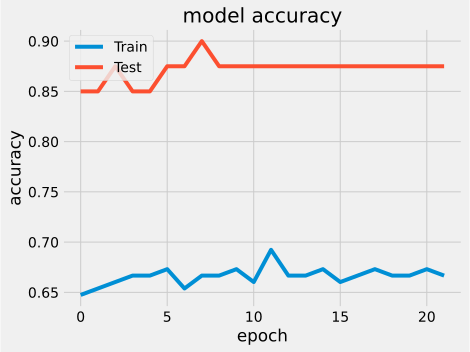

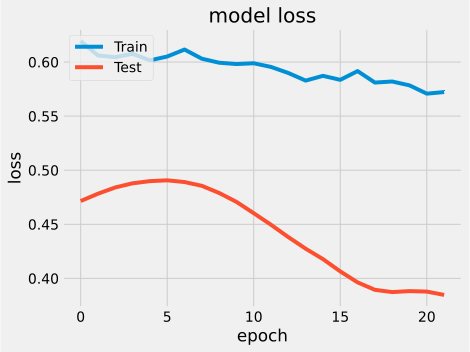

In [157]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [158]:
print("Train Accuracy: ", model.evaluate(x_train, y_train)[1])
print("Test Accuracy: ", model.evaluate(x_test, y_test)[1])

5/5 [==============================] - 0s 8ms/step - loss: 0.5738 - accuracy: 0.6859
Train Accuracy:  0.6858974099159241
2/2 [==============================] - 0s 5ms/step - loss: 0.3847 - accuracy: 0.8750
Test Accuracy:  0.875


In [159]:
y_hat = model.predict(x_test)
y_hat = np.round(y_hat).flatten()
confusion_matrix(y_test, y_hat)
accuracy_score(y_test, y_hat)

2/2 [==============================] - 0s 6ms/step


0.875

In [168]:
import tensorflow as tf

def create_gru_model(input_len: int):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=128, output_dim=8, input_length=input_len),
        tf.keras.layers.GRU(16, return_sequences=True),
        tf.keras.layers.Dense(128, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

In [170]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
from matplotlib import cm

def memorization_visualization(input_sequence):
    model = create_gru_model(len(input_sequence))

    # Preprocess input sequence
    input_sequence = np.array([ord(c) for c in input_sequence]).reshape(1, -1)

    # Generate hidden states
    hidden_states = model.predict(input_sequence)[0]

    # Create memorization heatmap with colormap

    plt.figure(figsize=(10, 6))
    plt.imshow(hidden_states.T, aspect='auto', extent=[0, len(input_sequence[0]), 0, hidden_states.shape[1]])
    plt.title('Memorization Visualization')
    plt.xlabel('Character Position')
    plt.ylabel('Time Step')
    plt.colorbar(label='Hidden State Value')
    plt.show()

# Create Input Selector
input_sequence_selector = widgets.Text(value='hello', description='Input Sequence:')

# Create Interactive Plot
interactive_plot = interactive(memorization_visualization, input_sequence=input_sequence_selector)

# Display Interactive Plot
display(interactive_plot)

interactive(children=(Text(value='hello', description='Input Sequence:'), Output()), _dom_classes=('widget-int…